# ch4 모델 훈련

## 4.1 선형 회귀

선형 회귀 모델은 입력 특성의 가중치 합과 편향을 더해 예측을 만든다.
\begin{align}
\hat y = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + ... + \theta_n x_n
\end{align}

*   $hat y$은 예측값이다.
*   $n$은 특성의 수다.
*   $x_i$는 $i$번째 특성값이다.
*   $\theta_j는 $j$번째 모델 파라미터이다.

위 식은 벡터 형태로 더 간단하게 쓸 수 있다.

\begin{align}
\hat y = = h_\theta(\textbf{x}) = \theta^T \cdot \textbf{x}
\end{align}

*   $\theta$는 편향 $\theta_0$ 과 $\theta_1$에서 $\theta_n$까지 특성 가중치를 담고 있는 모델 파라미터 벡터
*   $\theta^T$는 $\theta$의 전치이다 행벡터
*   $\textbf{x}$는 $x_0$에서 $x_n$까지 담고 있는 샘플의 **특성 벡터**이다. $x_0$은 항상 1이다
*   $\theta^T \cdot \textbf{x}$는 $\theta^T$와 $\textbf{x}$의 점곱(dot product)이다
*   $h_\theta$는 모델 파라미터 $\theta$를 사용한 가설 함수이다.


이것이 선형 회귀 모델이다. 이제 모델을 훈련시키자. 모델을 훈련시킨다는 것은 모델이 훈련 세트에 가장 잘 맞도록 모델 파라미터를 설정하는 것이다. 이를 위해 먼저 모델이 훈련 데이터에 얼마나 맞는지 측정해야한다. 회귀에는 평균 제곱근 오차(RMSE)를 잘 사용한다. 즉 RMSE를 최소화하는 $\theta$를 찾아야 한다. 실제로 RMSE보다 평균 제곱 오차(MSE)를 최소화하는 것이 같은 결과를 내면서 간단하다.

훈련 세트 $X$에 대한 선형 회귀 가설 $h_\theta$의 MSE를 계산한다
\begin{align}
MSE(X, h_\theta) = {1 \over m} \sum_{i=1}^m(\theta^T \cdot x^{(i)} - y^{(i)})^2
\end{align}

### 4.1.1 정규방정식

비용 함수(cost_function)를 최소화하는 $\theta$ 값을 찾기 위한 해석적인 방법이 있다. 다른 말로하면 결과를 바로 얻을 수 잇는 수학 공식, 즉 정규방적식이 있다.
\begin{align}
\hat \theta = (X^T \cdot X)^{-1} \cdot X^T \cdot \textbf y
\end{align}
*   $\hat \theta$은 비용 함수를 최소화하는 $\theta$ 값이다
*   $\textbf y$는 $y^{(1)}$부터 $y^{(n)}$까지 포함하는 타깃 벡터이다

In [1]:
# 선형처럼 보이는 데이터 생성
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

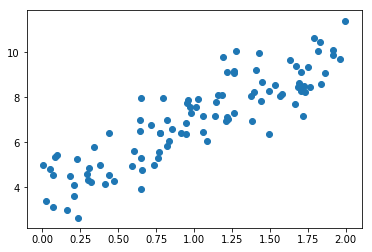

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(X, y)

In [4]:
# theta hat 계산
X_b = np.c_[np.ones((100, 1)), X] # x0 = 1
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
# SVD를 사용하여 유사 역행렬을 구하는 pinv() 행렬을 사용하면 간단하게 계산가능
# theta_best = np.linalg.pinv(X_b).dot(y)

In [12]:
# 실제 함수는 y = 4 + 3x1 + 가우시안 노이즈 (엡실론)
theta_best

array([[3.88877303],
       [3.07464694]])

In [17]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]

In [18]:
y_predict = X_new_b.dot(theta_best)

In [19]:
y_predict

array([[ 3.88877303],
       [10.03806691]])

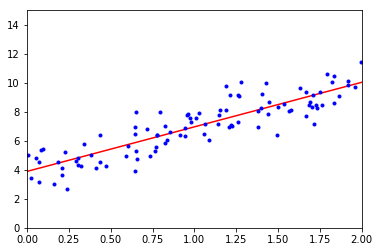

In [20]:
# 그래프
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [21]:
# 같은 작업을 하는 사이킷런 코드
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.88877303]), array([[3.07464694]]))

In [22]:
lin_reg.predict(X_new)

array([[ 3.88877303],
       [10.03806691]])